In [2]:
# Import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import  Activation,Dense, Conv2D, MaxPooling2D , Flatten, AveragePooling2D
from keras import optimizers
from keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy

2025-05-29 07:56:09.588939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748480169.604999  159651 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748480169.609669  159651 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748480169.623157  159651 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748480169.623177  159651 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748480169.623180  159651 computation_placer.cc:177] computation placer alr

In [3]:
# Load Dataset
(X,y),(X_test,y_test) = datasets.cifar10.load_data()
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,train_size=0.8)

# Normalize 
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

categories = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships","trucks"]

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2025-05-29 07:35:53.722175: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 07:35:54.160355: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - F1Score: 0.1951 - accuracy: 0.2793 - loss: 1.9059 - val_F1Score: 0.1954 - val_accuracy: 0.5463 - val_loss: 1.2569
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.5914 - loss: 1.1366 - val_F1Score: 0.1954 - val_accuracy: 0.6541 - val_loss: 0.9912
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.7006 - loss: 0.8513 - val_F1Score: 0.1955 - val_accuracy: 0.7133 - val_loss: 0.8194
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.7699 - loss: 0.6490 - val_F1Score: 0.1956 - val_accuracy: 0.7606 - val_loss: 0.6947
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.8178 - loss: 0.5185 - val_F1Score: 0.1955 - val_accuracy: 0.7627 - val_loss: 0.7111
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - F1Score: 0.1956 - accuracy: 0.8586 - loss: 0.3978 - val_F1Score: 0.1955 - val_accuracy: 0.7648 - val_loss

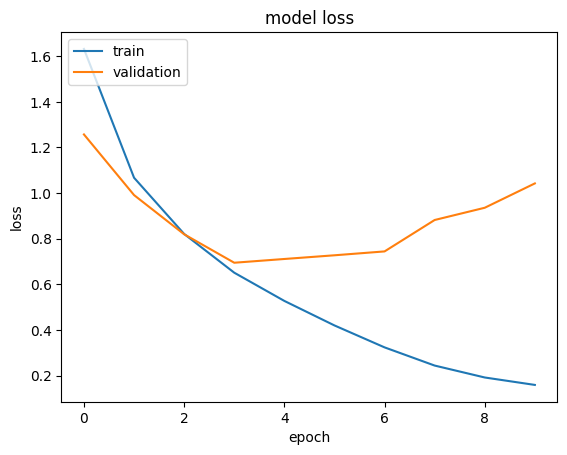

In [25]:
# Model 1: Baseline

model1 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model1.save_weights("model1.weights.h5")

# Grafik Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - F1Score: 0.1950 - accuracy: 0.3586 - loss: 1.7255 - val_F1Score: 0.1951 - val_accuracy: 0.5809 - val_loss: 1.1876
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.6254 - loss: 1.0593 - val_F1Score: 0.1955 - val_accuracy: 0.6641 - val_loss: 0.9614
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.7133 - loss: 0.8210 - val_F1Score: 0.1954 - val_accuracy: 0.7138 - val_loss: 0.8299
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.7659 - loss: 0.6756 - val_F1Score: 0.1955 - val_accuracy: 0.7374 - val_loss: 0.7743
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.8063 - loss: 0.5490 - val_F1Score: 0.1956 - val_accuracy: 0.7511 - val_loss: 0.7517
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.8475 - loss: 0.4390 - val_F1Score: 0.1956 - val_accuracy: 0.7505 - val_

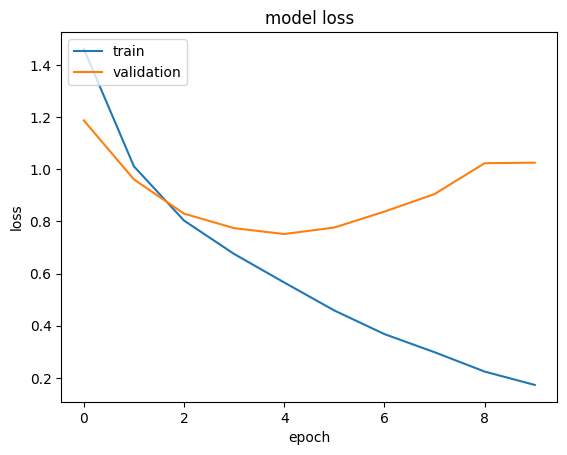

In [27]:
# Model 2: Less Conv Layer

model2 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model2.save_weights("model2.weights.h5")

# Grafik Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - F1Score: 0.1934 - accuracy: 0.2207 - loss: 2.0572 - val_F1Score: 0.1953 - val_accuracy: 0.4657 - val_loss: 1.4524
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.5064 - loss: 1.3547 - val_F1Score: 0.1952 - val_accuracy: 0.5814 - val_loss: 1.1440
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.6161 - loss: 1.0867 - val_F1Score: 0.1954 - val_accuracy: 0.6609 - val_loss: 0.9682
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.6860 - loss: 0.8733 - val_F1Score: 0.1953 - val_accuracy: 0.6839 - val_loss: 0.8820
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.7436 - loss: 0.7209 - val_F1Score: 0.1956 - val_accuracy: 0.7002 - val_loss: 0.8597
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.7923 - loss: 0.5881 - val_F1Score: 0.1956 - val_accuracy: 0.7346

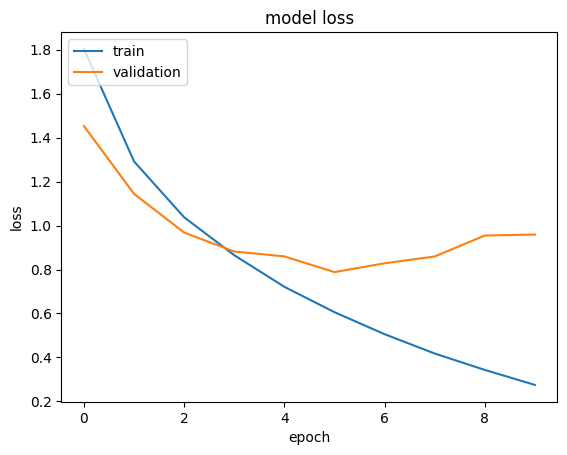

In [28]:
# Model 3: More Conv Layer

model3 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history3 = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model3.save_weights("model3.weights.h5")

# Grafik Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10


2025-05-29 07:53:34.530808: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_546', 80 bytes spill stores, 80 bytes spill loads

2025-05-29 07:53:35.121829: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_856', 116 bytes spill stores, 116 bytes spill loads

2025-05-29 07:53:35.200219: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_856', 72 bytes spill stores, 72 bytes spill loads

2025-05-29 07:53:35.304166: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_856', 64 bytes spill stores, 64 bytes spill loads

2025-05-29 07:53:35.339879: I external/loc

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - F1Score: 0.1936 - accuracy: 0.2657 - loss: 1.9166 - val_F1Score: 0.1949 - val_accuracy: 0.5072 - val_loss: 1.3198
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - F1Score: 0.1955 - accuracy: 0.5350 - loss: 1.2758 - val_F1Score: 0.1954 - val_accuracy: 0.6044 - val_loss: 1.0946
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - F1Score: 0.1956 - accuracy: 0.6298 - loss: 1.0359 - val_F1Score: 0.1955 - val_accuracy: 0.6458 - val_loss: 0.9878
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - F1Score: 0.1957 - accuracy: 0.6921 - loss: 0.8700 - val_F1Score: 0.1954 - val_accuracy: 0.6780 - val_loss: 0.9131
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - F1Score: 0.1956 - accuracy: 0.7342 - loss: 0.7561 - val_F1Score: 0.1954 - val_accuracy: 0.6953 - val_loss: 0.8849
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - F1Score: 0.1956 - accuracy: 0.7797 - loss: 0.6316 - val_F1Score: 0.1956 - val_accuracy: 0.7231 - val_loss: 0.8073
E

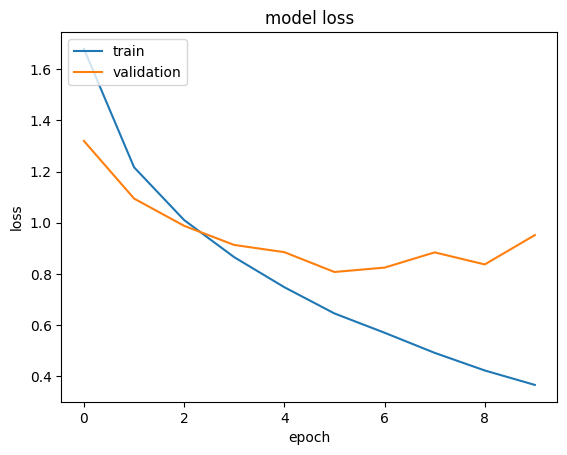

In [33]:
# Model 4: More Filter Layer
tf.keras.backend.clear_session()

model4 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2),padding='same'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2),padding='same'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2),padding='same'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history4 = model4.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model4.save_weights("model4.weights.h5")

# Grafik Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748480183.628573  159651 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2158 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


2025-05-29 07:56:24.678509: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 07:56:24.940670: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
I0000 00:00:1748480186.974153  160316 service.cc:152] XLA service 0x71f608003290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748480186.974172  160316 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-29 07:56:27.016398: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748480187.346477  160316 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-05-29 07:56:27.884667: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning

  2/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - F1Score: 0.1712 - accuracy: 0.1133 - loss: 2.5036   

I0000 00:00:1748480200.328070  160316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - F1Score: 0.1945 - accuracy: 0.2737 - loss: 1.9510 - val_F1Score: 0.1955 - val_accuracy: 0.5017 - val_loss: 1.3660
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - F1Score: 0.1955 - accuracy: 0.5376 - loss: 1.2954 - val_F1Score: 0.1955 - val_accuracy: 0.5835 - val_loss: 1.1696
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - F1Score: 0.1956 - accuracy: 0.6393 - loss: 1.0179 - val_F1Score: 0.1954 - val_accuracy: 0.6406 - val_loss: 1.0051
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - F1Score: 0.1956 - accuracy: 0.7068 - loss: 0.8289 - val_F1Score: 0.1954 - val_accuracy: 0.6457 - val_loss: 0.9923
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - F1Score: 0.1956 - accuracy: 0.7684 - loss: 0.6557 - val_F1Score: 0.1955 - val_accuracy: 0.6638 - val_loss: 1.0503
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - F1Score: 0.1956 - accuracy: 0.8350 - loss: 0.4719 - val_F1Score: 0.1956 - val_accuracy: 0.6626 - val_loss

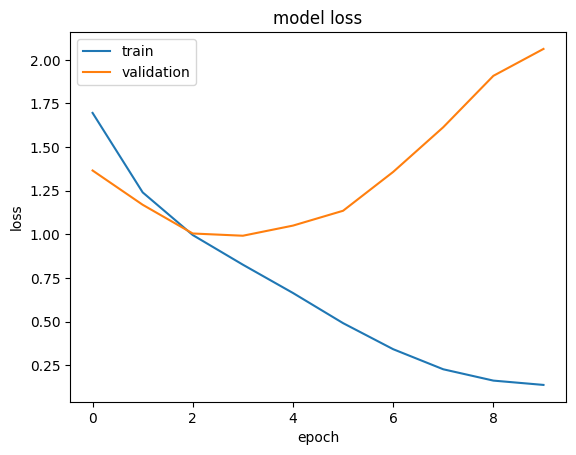

In [4]:
# Model 5: Less Filter Layer

tf.keras.backend.clear_session()

model5 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history5 = model5.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model5.save_weights("model5.weights.h5")

# Grafik Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2025-05-29 08:05:46.106199: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 08:05:46.449853: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - F1Score: 0.1922 - accuracy: 0.1927 - loss: 2.0867 - val_F1Score: 0.1946 - val_accuracy: 0.4824 - val_loss: 1.4532
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - F1Score: 0.1956 - accuracy: 0.5500 - loss: 1.2385 - val_F1Score: 0.1944 - val_accuracy: 0.6070 - val_loss: 1.1142
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - F1Score: 0.1956 - accuracy: 0.6660 - loss: 0.9435 - val_F1Score: 0.1954 - val_accuracy: 0.6935 - val_loss: 0.8749
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - F1Score: 0.1956 - accuracy: 0.7303 - loss: 0.7656 - val_F1Score: 0.1953 - val_accuracy: 0.7070 - val_loss: 0.8276
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - F1Score: 0.1956 - accuracy: 0.7775 - loss: 0.6371 - val_F1Score: 0.1955 - val_accuracy: 0.7383 - val_loss: 0.7526
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - F1Score: 0.1956 - accuracy: 0.8224 - loss: 0.5136 - val_F1Score: 0.1955 - val_accuracy: 0.7384 - val_loss: 0.7

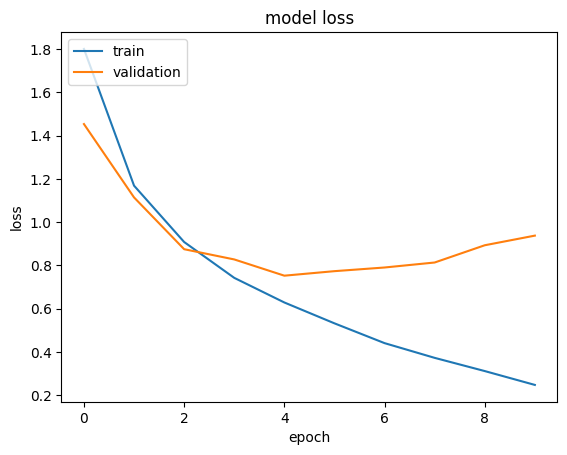

In [5]:
# Model 6: Bigger Filter Layer

model6 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history6 = model6.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model6.save_weights("model6.weights.h5")

# Grafik Loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 08:08:06.286713: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - F1Score: 0.1948 - accuracy: 0.2946 - loss: 1.9054 - val_F1Score: 0.1952 - val_accuracy: 0.5311 - val_loss: 1.3068
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - F1Score: 0.1956 - accuracy: 0.5705 - loss: 1.2062 - val_F1Score: 0.1956 - val_accuracy: 0.6463 - val_loss: 0.9915
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - F1Score: 0.1956 - accuracy: 0.6810 - loss: 0.9008 - val_F1Score: 0.1954 - val_accuracy: 0.6983 - val_loss: 0.8686
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - F1Score: 0.1956 - accuracy: 0.7462 - loss: 0.7210 - val_F1Score: 0.1956 - val_accuracy: 0.7144 - val_loss: 0.8214
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - F1Score: 0.1956 - accuracy: 0.7977 - loss: 0.5769 - val_F1Score: 0.1956 - val_accuracy: 0.7225 - val_loss: 0.8123
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - F1Score: 0.1956 - accuracy: 0.8453 - loss: 0.4462 - val_F1Score: 0.1956 - val_accuracy: 0.7114

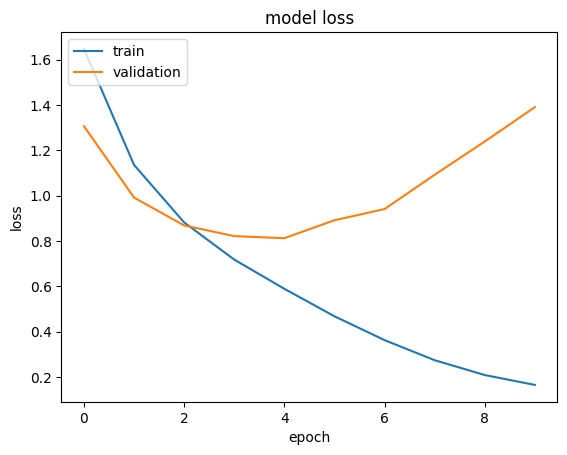

In [6]:
# Model 7: Smaller filter

model7 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((1,2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((1,2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((1,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history7 = model7.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model7.save_weights("model7.weights.h5")

# Grafik Loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - F1Score: 0.1949 - accuracy: 0.3175 - loss: 1.8365

2025-05-29 08:19:26.170263: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 424.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - F1Score: 0.1949 - accuracy: 0.3177 - loss: 1.8361 - val_F1Score: 0.1954 - val_accuracy: 0.5201 - val_loss: 1.3166
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.5682 - loss: 1.2130 - val_F1Score: 0.1956 - val_accuracy: 0.6455 - val_loss: 0.9912
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.6783 - loss: 0.9113 - val_F1Score: 0.1954 - val_accuracy: 0.6995 - val_loss: 0.8687
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.7398 - loss: 0.7346 - val_F1Score: 0.1955 - val_accuracy: 0.7297 - val_loss: 0.7683
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.7813 - loss: 0.6146 - val_F1Score: 0.1956 - val_accuracy: 0.7568 - val_loss: 0.7043
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1957 - accuracy: 0.8246 - loss: 0.4983 - val_F1Score: 0.1954 - val_accuracy: 0.7580 - val_loss

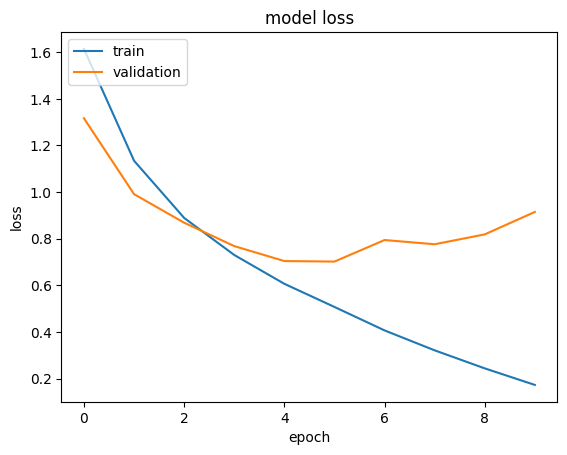

In [8]:
# Model 8: Average Pooling

model8 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model8.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history8 = model8.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model8.save_weights("model8.weights.h5")

# Grafik Loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()